In [1]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Dataset_w6.xlsx')
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0


In [3]:
df.isna().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

# 1.Find out how many countries are there in the dataset.

In [4]:
df.value_counts('country').sum()

196

# 2.Find out how many countries with respect to the region are available in the dataset

In [5]:
df.groupby(['Region','country']).size()

Region         country               
Caribbean      Antigua and Barbuda       1
               Bahamas                   1
               Barbados                  1
               British Virgin Islands    1
               Cayman Islands            1
                                        ..
WesternEurope  France                    1
               Germany                   1
               Luxembourg                1
               Netherlands               1
               Switzerland               1
Length: 196, dtype: int64

In [6]:
df['Region'].value_counts()

WesternAsia          18
EasternAfrica        17
Caribbean            16
WesternAfrica        15
SouthAmerica         12
SouthernEurope       12
South-easternAsia    11
EasternEurope        10
NorthernEurope       10
SouthernAsia          9
MiddleAfrica          9
CentralAmerica        8
WesternEurope         7
EasternAsia           7
SouthernAfrica        5
Polynesia             5
NorthernAfrica        5
Melanesia             5
CentralAsia           5
NorthernAmerica       4
Micronesia            4
Oceania               2
Name: Region, dtype: int64

# 3. On average which region has the highest
   # a. GDP per capita (current US) b. International trade: Imports (million US$)

In [7]:
df1=df.groupby('Region')['International trade: Imports (million US$)'].mean().nlargest()
df1

Region
NorthernAmerica    663552.250000
EasternAsia        451995.000000
WesternEurope      407498.428571
NorthernEurope     113407.200000
Oceania            112914.500000
Name: International trade: Imports (million US$), dtype: float64

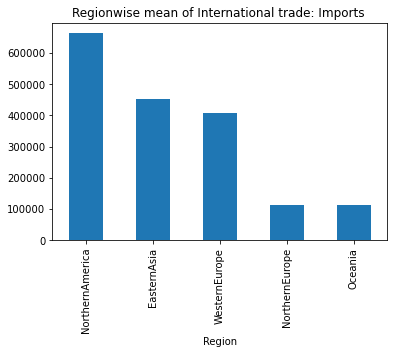

In [8]:
df1.plot(kind='bar')
plt.title('Regionwise mean of International trade: Imports ')
plt.show()

In [9]:
df2=df.groupby('Region')['GDP per capita (current US$)'].mean().nlargest()
df2

Region
NorthernAmerica    57659.000000
WesternEurope      55387.128571
Oceania            44823.250000
NorthernEurope     42098.220000
EasternAsia        27967.614286
Name: GDP per capita (current US$), dtype: float64

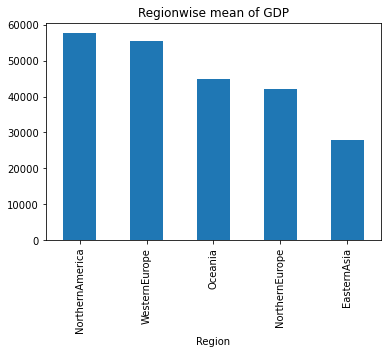

In [10]:
df2.plot(kind='bar')
plt.title('Regionwise mean of GDP')
plt.show()

It is seen that the region with highest average for GDP and International trade is Northern America.

# 4. Find out which region has more consistent with respect to GDP per capita (current US$)

In [11]:
df.groupby('Region')['GDP per capita (current US$)'].var().nsmallest()

Region
WesternAfrica     6.643805e+05
NorthernAfrica    9.500529e+05
SouthernAfrica    4.741729e+06
SouthernAsia      8.155069e+06
EasternAfrica     1.380964e+07
Name: GDP per capita (current US$), dtype: float64

In [12]:
df3=df.groupby('Region')['GDP per capita (current US$)'].std().sort_values()
df3

Region
WesternAfrica          815.095399
NorthernAfrica         974.706575
SouthernAfrica        2177.551120
SouthernAsia          2855.708179
EasternAfrica         3716.131770
CentralAsia           4152.215490
CentralAmerica        4180.440883
SouthAmerica          4273.707394
Micronesia            4820.669694
MiddleAfrica          5274.846281
EasternEurope         5415.488739
Polynesia             6956.250286
Oceania               9233.329638
SouthernEurope        9541.703216
Melanesia            13855.842686
Caribbean            14579.371326
South-easternAsia    16311.810656
WesternAsia          18812.151459
NorthernEurope       20671.030185
WesternEurope        24770.467728
NorthernAmerica      25749.619445
EasternAsia          27485.120923
Name: GDP per capita (current US$), dtype: float64

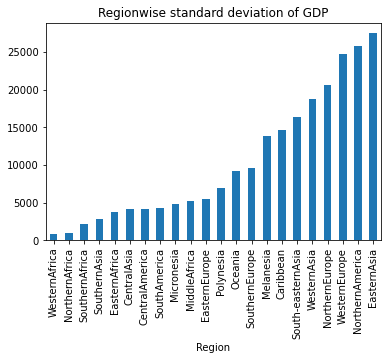

In [13]:
df3.plot(kind='bar')
plt.title('Regionwise standard deviation of GDP')
plt.show()

The lesser the standard deviation the higher the consistency.
Here region WesternAfrica has lowest standard deviation with respect to GDP per capita,so is more consistent. 